<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial113_what_are_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single image reconstruction using autoencoders.


https://youtu.be/kpnGB6Y89OY

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


In [ ]:
SIZE=256

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(256, 256, 3)


In [ ]:
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 256, 256, 3)


In [ ]:
img_array = img_array.astype('float32') / 255.


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       5

In [ ]:
model.fit(img_array, img_array, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 32s 32s/step - loss: 0.0694 - accuracy: 0.2915
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0592 - accuracy: 0.2481
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0450 - accuracy: 0.5941
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0445 - accuracy: 0.5955
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0403 - accuracy: 0.5997
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.5960
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0315 - accuracy: 0.5985
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0243 - accuracy: 0.6073
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0180 - accuracy: 0.5965
Epoch 11/

In [ ]:
pred = model.predict(img_array)



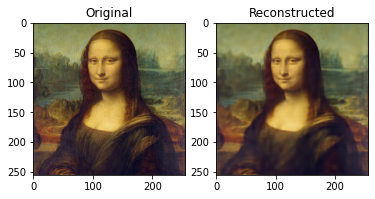

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.title('Reconstructed')
plt.show()